# Preprocessing Data

Sometimes we need to do some preprocessing of our data before fitting our machine learning models.
- Encoding categorical data
- Scaling numerical data

Let's see how we can do this with our diamonds dataset.

1. Importing necessary modules

In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split #split training and testing data
from sklearn.linear_model import LinearRegression #machine learning
from sklearn.metrics import mean_squared_error #model evaluation
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

2. Load dataset

In [2]:
df = pd.read_csv("diamonds.csv")

df.head()

Let's try to predict the values of price.

<Axes: >

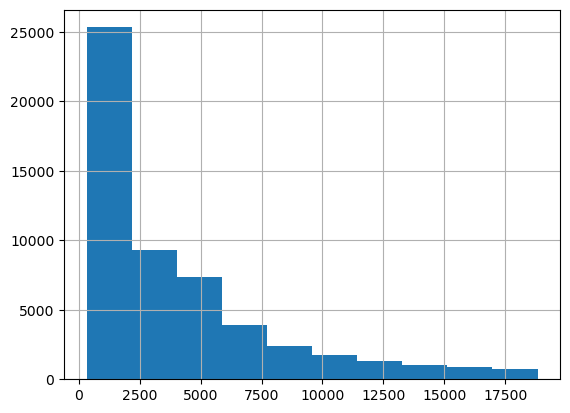

In [3]:
df.price.hist()

In [8]:
one_hot_df = pd.get_dummies(df, columns = ['cut', 'clarity', 'color']) 
print(one_hot_df)

       carat  depth  table  price     x     y     z  cut_Fair  cut_Good  \
0       0.23   61.5   55.0    326  3.95  3.98  2.43         0         0   
1       0.21   59.8   61.0    326  3.89  3.84  2.31         0         0   
2       0.23   56.9   65.0    327  4.05  4.07  2.31         0         1   
3       0.29   62.4   58.0    334  4.20  4.23  2.63         0         0   
4       0.31   63.3   58.0    335  4.34  4.35  2.75         0         1   
...      ...    ...    ...    ...   ...   ...   ...       ...       ...   
53935   0.72   60.8   57.0   2757  5.75  5.76  3.50         0         0   
53936   0.72   63.1   55.0   2757  5.69  5.75  3.61         0         1   
53937   0.70   62.8   60.0   2757  5.66  5.68  3.56         0         0   
53938   0.86   61.0   58.0   2757  6.15  6.12  3.74         0         0   
53939   0.75   62.2   55.0   2757  5.83  5.87  3.64         0         0   

       cut_Ideal  ...  clarity_VS2  clarity_VVS1  clarity_VVS2  color_D  \
0              1  ...   

In [9]:
one_hot_df.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,clarity_VS2,clarity_VVS1,clarity_VVS2,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [10]:
y = one_hot_df["price"] # Features
X = one_hot_df.drop(['price'], axis=1) # Target variable (price of diamonds)

In [11]:
X.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Fair', 'cut_Good',
       'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'clarity_I1', 'clarity_IF',
       'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2',
       'clarity_VVS1', 'clarity_VVS2', 'color_D', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J'],
      dtype='object')

In [12]:
y

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53940, dtype: int64

3. Splitting the data

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## `StandardScaler`
---

Sometimes, our variables are not from the same scale, especially when performing clustering and distance measures are calculated. 

It may be important to scale our data. In the cells below, we will create an instance of `StandardScaler` and use it to transform `X_train` and `X_test`.

This will:
- calculate the mean and sd of the training data so that it can be transformed to the standard normal scale (mean = 0, sd = 1)
- Transform the test data using the same mean and sd from the training data 

In [14]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

4. Creating and training the model

In [15]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train_sc, y_train)

LinearRegression()

5. Making predictions

In [16]:
# Make predictions using the trained model
y_pred = model.predict(X_test_sc)


6. Calculating Mean Squared Error

In [17]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1248375.6651910949


7. Plotting predicted vs. actual values

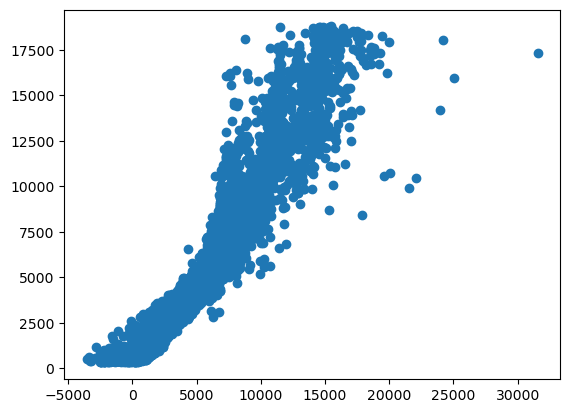

In [21]:
# Plot predicted vs. actual values
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(y_pred,y_test)

8. Model Evaluation 

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('Mean Absolute Error (MAE)',mean_absolute_error(y_test,y_pred))
print('Root Mean Squared Error (RMSE) setting squared = false',mean_squared_error(y_test,y_pred, squared=False))
print('Root Mean Squared Error (RMSE)',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R-squared:',r2_score(y_test,y_pred))

Mean Absolute Error (MAE) 737.6211074753109
Root Mean Squared Error (RMSE) setting squared = false 1117.3073279948962
Root Mean Squared Error (RMSE) 1117.3073279948962
R-squared: 0.9212464774611463


1. Mean Absolute Error (MAE):

-MAE measures the average absolute difference between the actual values and the predicted values.

-In this case, the MAE is approximately 3.843. This means, on average, the linear regression model's predictions are off by about 3.843 units from the actual values.

-MAE is easy to understand and gives a sense of the magnitude of errors in your model's predictions.

2. Root Mean Squared Error (RMSE):

-RMSE is similar to MAE but gives more weight to larger errors because it takes the square of the differences.

-In this case, the RMSE is approximately 5.784. This means, on average, your model's predictions are off by about 5.784 units from the actual values, and larger errors have a more significant impact on this metric compared to MAE.

-RMSE is sensitive to outliers and is a useful metric when you want to penalize larger errors more.

3. R-squared (R²):

-R-squared measures the proportion of the variance in the dependent variable (the one you're trying to predict) that is predictable from the independent variables (features) in your model.

-In this case, the R-squared value is approximately 0.5892, which means that about 58.92% of the variance in the dependent variable is explained by your linear regression model.

-R-squared ranges from 0 to 1, where 1 indicates that the model explains all the variance, and 0 indicates that the model explains none of the variance.







In [ ]:
list=[15,30,40,55,75,90]

In [ ]:
np.mean(list)

In [ ]:
(15-np.mean(list))**2
